# Lab 1: Visualization and Data Preprocessing
## Telco Customer Churn
#### Evan Adams, Lijju Mathew, Sid Swarupananda

##### Business Understanding
Customer churn has many definitions: customer attrition, customer turnover, customer defection, etc. They all refer to tge loss of customers which can be by choice (voluntary) or relocation (involuntary). Our team's goal is to predict which customers are at risk of churning. Our analysis helps the Telco company design activities and create strategies to retain customers, their main asset, and minimize churn. The Telco Customer Churn dataset is from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churnIn). The dataset has 7,043 entries (customers) and 21 attributes that capture information such as demographics and customer relationship history. All customer entries contain several features and an attribute stating if the customer has churned or not. To better understand the data we will first load it into the pandas package and explore it with the help of some basic commands.

##### Data Understanding
The data contains 7,043 customer entries consisting of 21 attributes. They are detailed below:
- **customerID**: Customer ID number
- **gender**: Customer's gender (male/female)
- **SeniorCitizen**: Senior citizen status (1/0)
- **Partner**: Does the customer live with a partner (Yes/No)
- **Dependents**: Does the customer have dependents (Yes/No)
- **tenure**: Number of months the customer has been with the telco (int)
- **PhoneService**: Does the customer have phone service (Yes/No)
- **MultipleLines**: Does the customer have multiple phone lines (Yes/No/No phone service)
- **InternetService**: Customer's internet type (DSL/Fiber optic/No)
- **OnlineSecurity**: Telco provided online security (Yes/No/No internet service)
- **OnlineBackup**: Does the customer have online backups (Yes/No/No internet service)
- **DeviceProtection**: Does the customer have device protection (Yes/No/No internet service)
- **TechSupport**: Does the telco provide tech support to the customer (Yes/No/No internet service)
- **StreamingTV**: Does the customer have streaming TV services (Yes/No/No internet service)
- **StreamingMovies**: Does the customer have streaming movie services (Yes/No/No internet service)
- **Contract**: Customer's contract term in months (Month-to-month/One year/Two year)
- **PaperlessBilling**: Does the customer receive physical bills (Yes/No)
- **PaymentMethod**: How does the customer pay their bill (Electronic check/Mailed check/Bank transfer (auto)/Credit card (auto))
- **MonthlyCharges**: The customer's monthly bill (int)
- **TotalCharges**: Total amount charged to the customer over their tenure with the telco (int)
- **Churn**: Has the customer left the telco (Yes/No)

In [1]:
# Import basic packages lik numpy, pandas, math plot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as pr
from sklearn.preprocessing import LabelEncoder

In [2]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/lijjumathew/MSDS-Machine-Learning-1-Project/master/dataset/Telco-Customer-Churn.csv')
df.sample(5).T

,6823,2599,826,2912,4352
customerID,7009-LGECI,6384-VMJHP,3643-AHCFP,0674-DGMAQ,0595-ITUDF
gender,Female,Female,Male,Male,Male
SeniorCitizen,0,0,1,1,0
Partner,No,No,Yes,Yes,Yes
Dependents,No,No,No,No,Yes
tenure,4,72,7,32,64
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,No,No,Yes,Yes,Yes
InternetService,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,Yes,Yes,No,No,Yes


In [3]:
pr.ProfileReport(df)

Calling `df.info()` on our dataset gives us the name of each attribute, how many entries there are, how many of them are not null, and what their data type is. We can see that our data is divided into three types: object, int, and float. The object attributes are categorical, the int attributes are continuous integers, and the float attribute is a continuous number value that can contain decimals.

The `SeniorCitizen` attribute is of type `int` but it is used as a binary classification of whether the customer is a senior citizen or not. We will be changing this to (yes/no) to be consistent with the rest of the `object` type attributes. This leaves `tenure` as the only `int` object in the dataset.

The `TotalCharges` attribute is of type `object` but since it should be a `float` value we are changing it using a pandas function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Data Transformation
In this section we will clean up our dataset by dropping irrelvant data, treating missing values, and converting our variables to the proper data type.

- Ideally Senior Citizen column should be a factor, so we will convert 1,0 values to Yes, No
- In our dataset, we can see that Customer ID is not needed and so we are dropping this variable
- We can see that the column "Total Charges" has the type object but should be a number. We are changing it into numeric using   the pandas function pd.to_numeric
- We have 11 missing values for Total charges. We will fill null values with the mean values of Total charges

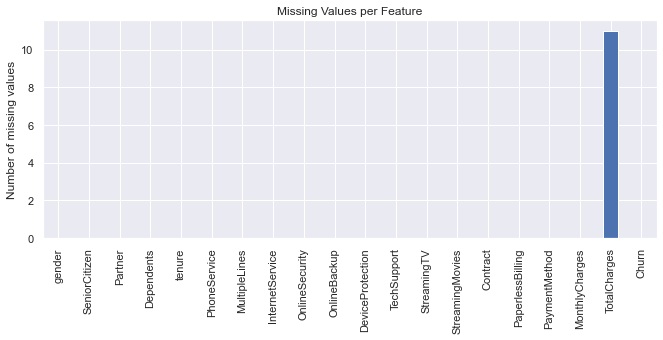

In [5]:
#Separating churn and non churn customers 
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

Id     = ['customerID']
target = ["Churn"]

#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns
df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')

# Getting rid of unwanted columns like Customer Id.
if 'customerID' in df:
    del df['customerID']
    
# converting TotalCharges object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

# Replacing blank values with nulls.
df=df.replace(r'^\s*$', np.nan, regex=True)
# Total charges has some blank values/missing values and needs to be imputed. Filling the missing values

#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');

df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

#Separating catagorical and numerical columns
df_cat = df.select_dtypes(exclude=["number","bool_","float_"])
df_num = df.select_dtypes(exclude=["bool_", "object_"])

In [6]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##### Simple Statistics
The dataset has three continuous variables to analyze. Using the `df.describe()` function we can make the following observations:
- Half of the customers remain in the company for more than 29 months
- The average monthly bill is about \$65
- The average revenue generated per customer is about $2284

In [7]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


##### Visualize Attributes
Visualization of data is the simplest form of analysis that allows us to examine how each variable relates to the churn rate. When we look at the below pie plot, we can see that we have 26.5 % of customers who churn in our dataset

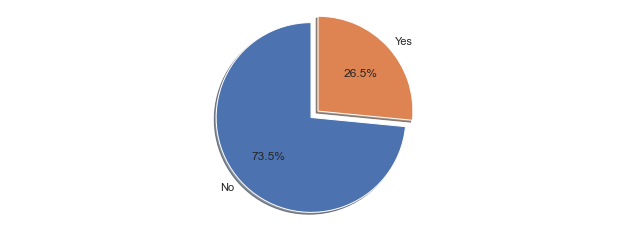

In [8]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis('equal') ;

###### Visualizing the categorical Attributes
Our major takeaways are as follows from the categorical features:

- The churn percent is almost equal in the case of males and females
- The percent of churn is higher in the case of senior citizens
- There are only few customers that do not have a phone service. The number of churn between multiple lines and single line customer is similar, but there are more no-churn customers in single line phone service. We can make an assumption why customers with multiple lines have a slightly higher churn rate is because some customers realize they don't need many lines and they may end up cancelling the service
- Customers with Partners and Dependents have a lower churn rate compared to those who do not
- Payment has 3 important features - Contract, Paperless Billing and Payment Method. 
In the churn distribution by Contract plot, we can see that majority of customer contracts are Month-to-Month and they hae a higher churn rate. Also, we can see that one and two-year contract customers have a higher loyalty to stay with the company. 
In the churn distribution by Paperless Billing plot, we can see that customers with paperless billing are more likely to churn 
In the churn distribution by Payment Methods plot, we can see that preferred payment method is Electronic check and it has very high churn rate
- Customers with no internet service have a low churn rate. Also, there is another insight where we can find out that customers with fiber optic are more probable to churn than those with DSL customers


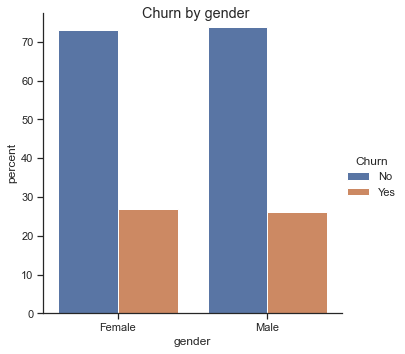

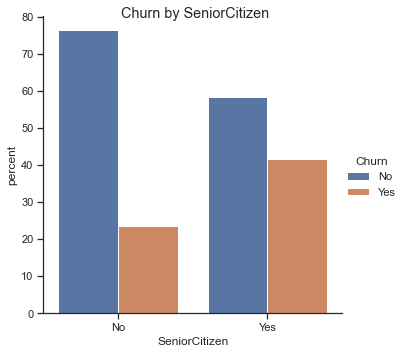

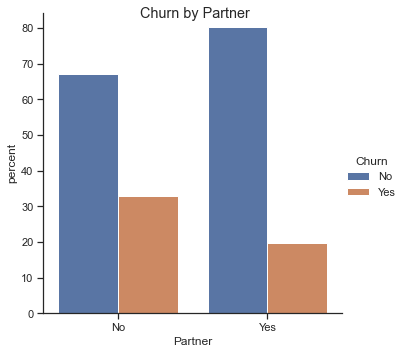

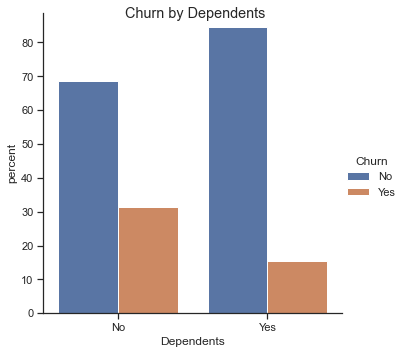

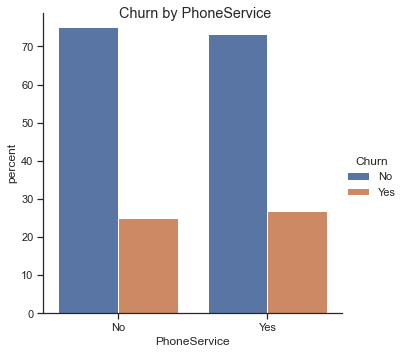

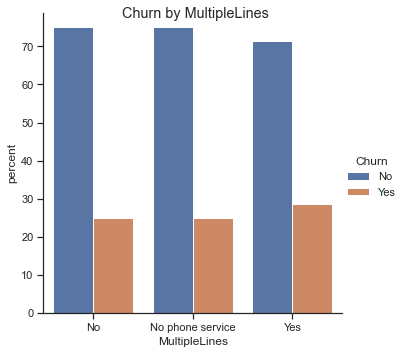

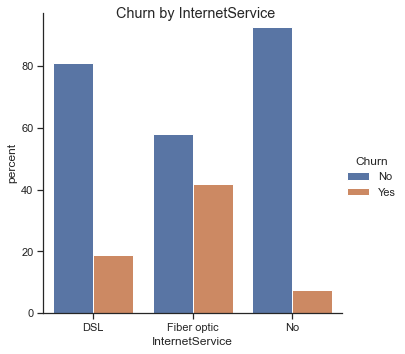

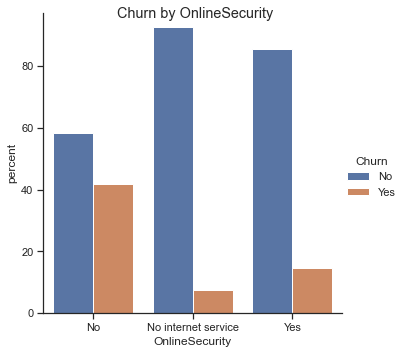

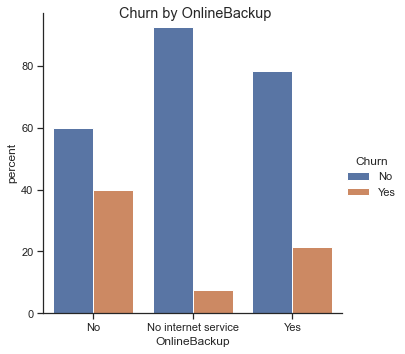

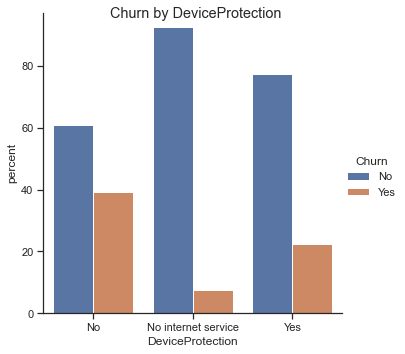

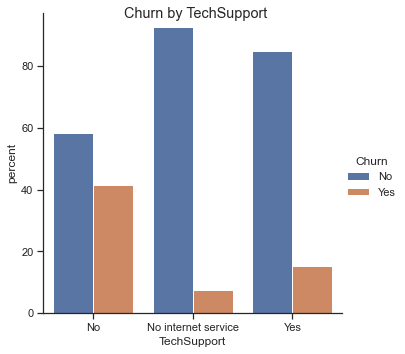

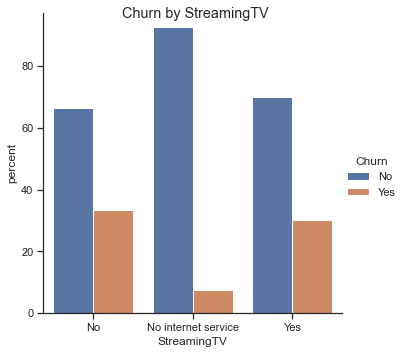

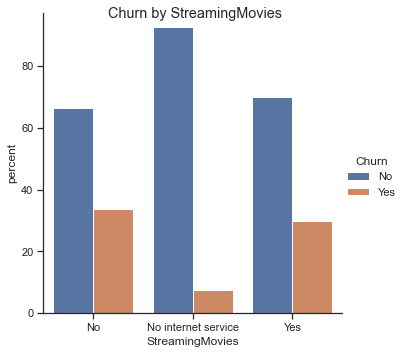

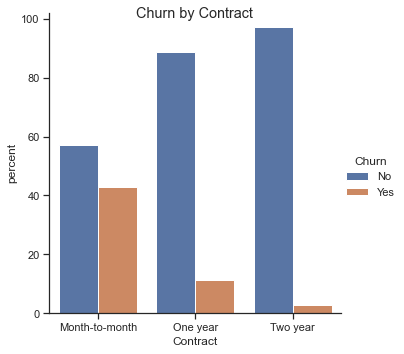

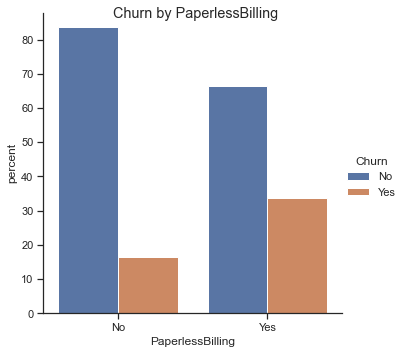

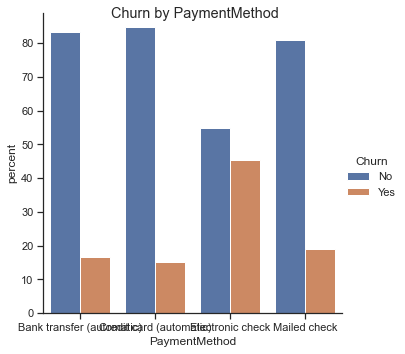

In [10]:
catvars = df.columns.tolist() 
catvars = [e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]
y = 'Churn'
for x in catvars:
    plot = df.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot


###### Visualizing the numerical features
We have 3 numerical features in our dataset: Tenure, Monthly Charges and Total Charges. From the below plots we can have below conclusions:

- Tenure and Monthly Charges highly affect the customer churn rate
- Customers with higher Monthly Charges are more likely to churn
- Longer the customer tenure, the less likely they are to cancel

Another inisght from the above plots, we can consider binning Tenure and Monthly charges. Most records in tenure below 10 have a high churn rate 

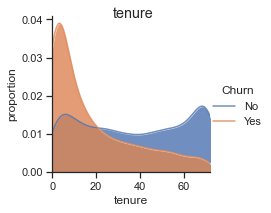

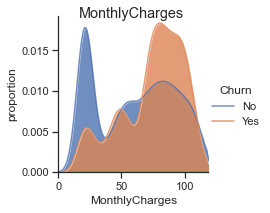

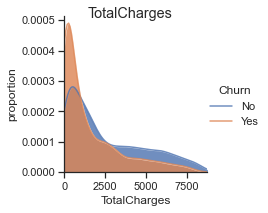

In [11]:
def plot_distribution_num(df_num):
    sns.set_style('ticks')
    s = sns.FacetGrid(df,hue='Churn')
    s.map(sns.kdeplot,df_num,shade = True, alpha = 0.8)
    s.set(xlim=(0,df[df_num].max()))
    s.add_legend()
    s.set_axis_labels(df_num,'proportion')
    s.fig.suptitle(df_num)
    plt.show()
    
plot_distribution_num('tenure')
plot_distribution_num('MonthlyCharges')
plot_distribution_num('TotalCharges')  

In [12]:
import plotly.offline as py#visualization 
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

trace1 = go.Scatter3d(x = churn['MonthlyCharges'], 
                      y = churn['TotalCharges'],
                      z = churn['tenure'],
                      mode = 'markers',
                      name = 'Churn customers',
                      text = 'Id : ' + churn['customerID'],
                      marker = dict(size = 1,color = 'red')
                     )
trace2 = go.Scatter3d(x = not_churn['MonthlyCharges'],
                      y = not_churn['TotalCharges'],
                      z = not_churn['tenure'],
                      name = 'Non churn customers',
                      text = 'Id : ' + not_churn['customerID'],
                      mode = 'markers',
                      marker = dict(size = 1,color= 'green')
                     )


layout = go.Layout(dict(title = 'Monthly charges,total charges & tenure in customer churn',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'monthly charges',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'total charges',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'tenure',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )
                                    ),
                        height = 700,
                       )
                  )
                  

data = [trace1,trace2]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)


In [13]:
import numpy as np
corr_abs = df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

tenure          TotalCharges      0.824757
MonthlyCharges  TotalCharges      0.650468
tenure          MonthlyCharges    0.247900
dtype: float64

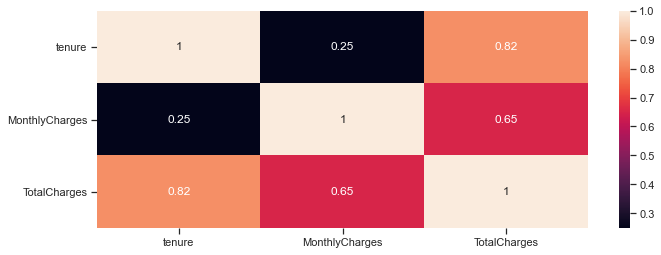

In [14]:
# Creating correlation heatmap
sns.heatmap(df.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

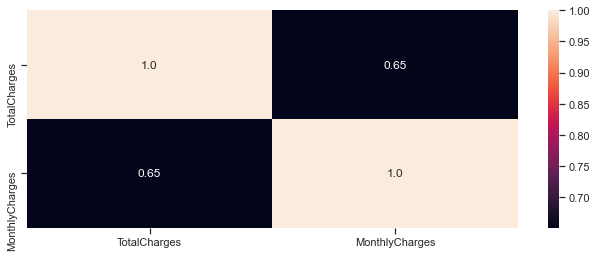

In [15]:
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr(),annot=True,fmt='.3');
#Since, monthly and Total Charges are corelated.. We'd need to remove one of them

In [16]:
# Tenure in months as year range
df['tenure_range'] = pd.cut(df.tenure,[0,12,24,36,48,60,72,84],3,
                            labels=['1 year','2 year','3 year', ' 4 year', '5 year', '6 year', '7 year'])

# change MonthlyCharges to categorical column 
def monthlycharges_split(df) : 
 if df['MonthlyCharges'] <= 30 :
     return '0–30'
 elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
     return '30–70'
 elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
     return '70–99'
 elif df['MonthlyCharges'] > 99 :
     return '99plus'
df['monthlycharges_bin'] = df.apply(lambda df:monthlycharges_split(df), axis = 1)